### Segment 6 - Delving into non-parametric methods using pandas and scipy

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import scipy
import matplotlib.pyplot as plt
from pylab import rcParams
from scipy.stats import spearmanr

%matplotlib inline
rcParams['figure.figsize'] = 14,7
sb.set_style('whitegrid')

**The Spearman Rank Correlation**


In [4]:
cars = pd.read_csv('mtcars.csv')
cars.rename({"Unnamed: 0":"name"}, inplace=True, axis=1)

In [5]:
cars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


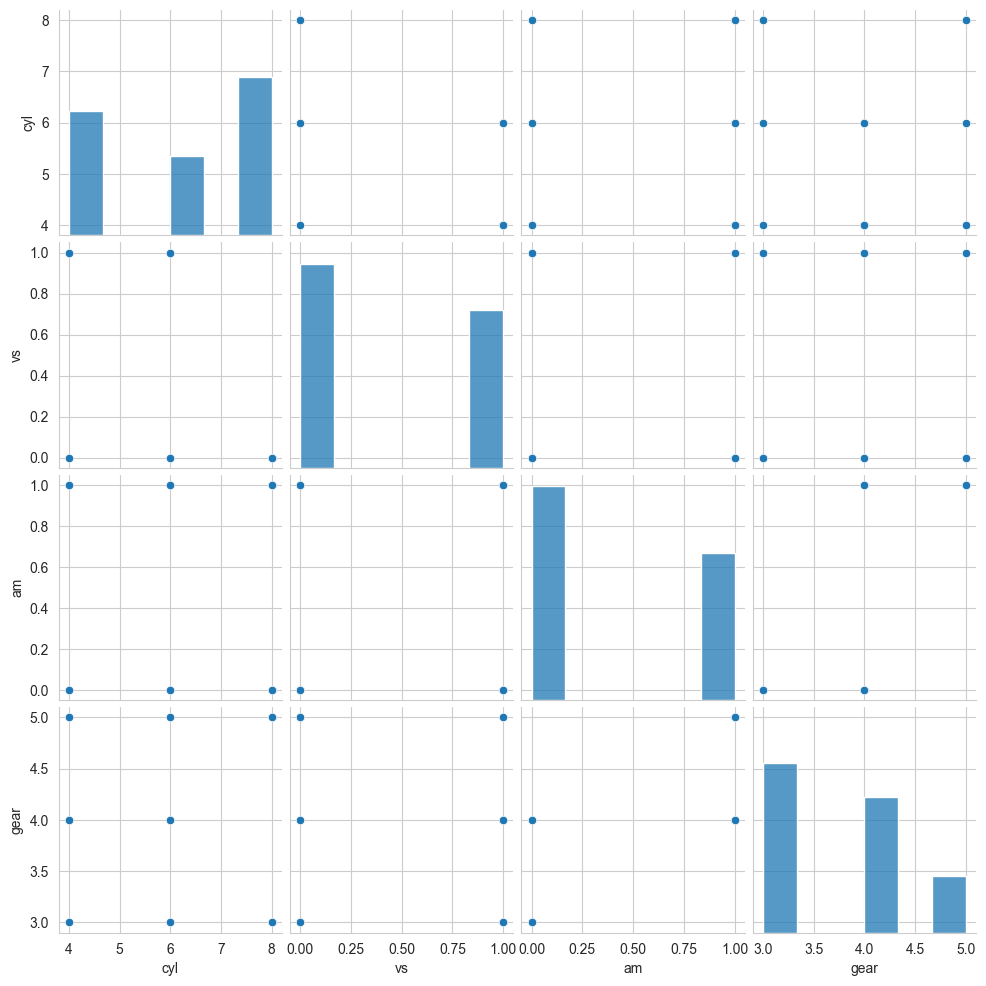

In [8]:
x = cars[['cyl', 'vs', 'am', 'gear']]
sb.pairplot(x)

In [15]:
cyl = cars['cyl']
vs = cars['vs']
am = cars['am']
gear = cars['gear']
spearmanr_coefficient, p_value = spearmanr(cyl, vs)
print(f"Spearman Rank correlation coefficient {spearmanr_coefficient:0.3f}")

Spearman Rank correlation coefficient -0.814


In [16]:
spearmanr_coefficient, p_value = spearmanr(cyl, am)
print(f"Spearman Rank correlation coefficient {spearmanr_coefficient:0.3f}")

Spearman Rank correlation coefficient -0.522


In [17]:
spearmanr_coefficient, p_value = spearmanr(cyl, gear)
print(f"Spearman Rank correlation coefficient {spearmanr_coefficient:0.3f}")

Spearman Rank correlation coefficient -0.564


**Chi-squared test for independence**

Null hypothesis: variables _are_ independent of one another.

Values of p < 0.05 : reject null hypothesis, variables are correlated.

Values of p > 0.05 : Accept the null hypothesis.

In [26]:
table = pd.crosstab(cyl, am)
table
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print(f"Chi-squared statistic {chi2:0.3f} p_value={p:0.3f}")

Chi-squared statistic 8.741 p_value=0.013


In [27]:
table = pd.crosstab(cyl, vs)
chi2, p, dof, expected = chi2_contingency(table.values)
print(f"Chi-squared statistic {chi2:0.3f} p_value={p:0.3f}")

Chi-squared statistic 21.340 p_value=0.000


In [28]:

table = pd.crosstab(cyl, gear)
chi2, p, dof, expected = chi2_contingency(table.values)
print(f"Chi-squared statistic {chi2:0.3f} p_value={p:0.3f}")

Chi-squared statistic 18.036 p_value=0.001
